In [9]:
from pymongo import MongoClient
import pandas as pd
from matplotlib import pyplot as plt
# Connexion à la base de données MongoDB
client = MongoClient('localhost', 27017)

# Sélection de la base de données
db = client.TEZEAU


# Récupération des collections
piezometrie = db.tbl_piezometrie
referentiel_stations = db.tbl_referentiel_stations

# Parcours des documents de la collection piezometrie
for document in piezometrie.find():
    # Récupération du code_bss
    code_bss = document['code_bss']
    
    # Recherche du document correspondant dans la collection referentiel_stations
    ref_station = referentiel_stations.find_one({'code_bss': code_bss})
    
    # Si un document correspondant est trouvé, récupération du nom de la commune
    if ref_station is not None:
        nom_commune = ref_station['nom_commune']
        
        # Ajout de l'information nom_commune dans le document de la collection piezometrie
        piezometrie.update_one({'_id': document['_id']}, {'$set': {'nom_commune': nom_commune}})




In [19]:
from pymongo import MongoClient
import pandas as pd
from matplotlib import pyplot as plt
# Connexion à la base de données MongoDB
client = MongoClient('localhost', 27017)

# Sélection de la base de données
db = client.TEZEAU


collection = db.tbl_piezometrie

# Exécution d'une requête
result = collection.find({"nom_commune": "Pihen-lès-Guînes"})
df_Pihen_lès_Guînes = pd.DataFrame(result)
df_Pihen_lès_Guînes['date_mesure'] = pd.to_datetime(df_Pihen_lès_Guînes['date_mesure'], format='%Y-%m-%dT%H:%M:%SZ')
df_Pihen_lès_Guînes=df_Pihen_lès_Guînes[df_Pihen_lès_Guînes['date_mesure'].dt.year == 2023]
df_Pihen_lès_Guînes

,_id,code_bss,urn_bss,timestamp_mesure,niveau_eau_ngf,longitude,latitude,bss_id,altitude_station,altitude_repere,date_mesure,profondeur_nappe,date_maj,nom_commune
0,6428d7d29473e387a76dcf37,00061X0117/PZ1,http://services.ades.eaufrance.fr/pointeau/000...,1680336000000,22.496,1.81808,50.867038,BSS000AGLR,35.13,35.76,2023-04-01 08:00:00,13.264,2023-04-01,Pihen-lès-Guînes
1,6428d7d29473e387a76dcf38,00061X0117/PZ1,http://services.ades.eaufrance.fr/pointeau/000...,1680332400000,22.500,1.81808,50.867038,BSS000AGLR,35.13,35.76,2023-04-01 07:00:00,13.260,2023-04-01,Pihen-lès-Guînes
2,6428d7d29473e387a76dcf39,00061X0117/PZ1,http://services.ades.eaufrance.fr/pointeau/000...,1680328800000,22.501,1.81808,50.867038,BSS000AGLR,35.13,35.76,2023-04-01 06:00:00,13.259,2023-04-01,Pihen-lès-Guînes
3,6428d7d29473e387a76dcf3a,00061X0117/PZ1,http://services.ades.eaufrance.fr/pointeau/000...,1680325200000,22.504,1.81808,50.867038,BSS000AGLR,35.13,35.76,2023-04-01 05:00:00,13.256,2023-04-01,Pihen-lès-Guînes
4,6428d7d29473e387a76dcf3b,00061X0117/PZ1,http://services.ades.eaufrance.fr/pointeau/000...,1680321600000,22.508,1.81808,50.867038,BSS000AGLR,35.13,35.76,2023-04-01 04:00:00,13.252,2023-04-01,Pihen-lès-Guînes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788,6428d7d49473e387a76dfebb,00061X0117/PZ1,http://services.ades.eaufrance.fr/pointeau/000...,1672545600000,20.621,1.81808,50.867038,BSS000AGLR,35.13,35.76,2023-01-01 04:00:00,15.139,2023-01-01,Pihen-lès-Guînes
6789,6428d7d49473e387a76dfebc,00061X0117/PZ1,http://services.ades.eaufrance.fr/pointeau/000...,1672542000000,20.614,1.81808,50.867038,BSS000AGLR,35.13,35.76,2023-01-01 03:00:00,15.146,2023-01-01,Pihen-lès-Guînes
6790,6428d7d49473e387a76dfebd,00061X0117/PZ1,http://services.ades.eaufrance.fr/pointeau/000...,1672538400000,20.611,1.81808,50.867038,BSS000AGLR,35.13,35.76,2023-01-01 02:00:00,15.149,2023-01-01,Pihen-lès-Guînes
6791,6428d7d49473e387a76dfebe,00061X0117/PZ1,http://services.ades.eaufrance.fr/pointeau/000...,1672534800000,20.604,1.81808,50.867038,BSS000AGLR,35.13,35.76,2023-01-01 01:00:00,15.156,2023-01-01,Pihen-lès-Guînes


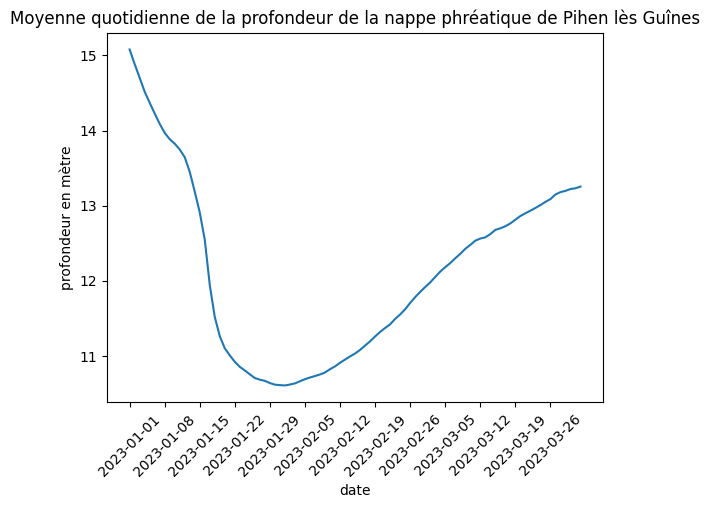

In [25]:



# Agréger les données par jour et calculer la moyenne de la nappe phréatique
df_daily = df_Pihen_lès_Guînes.groupby(pd.Grouper(key='date_mesure', freq='D')).mean()


plt.plot(df_daily.index, df_daily['profondeur_nappe'])
plt.title("Moyenne quotidienne de la profondeur de la nappe phréatique de Pihen lès Guînes")
plt.xlabel("date")
plt.ylabel("profondeur en mètre")
plt.xticks(df_daily.index[::7], rotation=45) # afficher les étiquettes de l'axe x tous les 7 jours
plt.show()


In [37]:
df_daily['profondeur_nappe']

date_mesure
2023-01-01    15.078750
2023-01-02    14.885125
2023-01-03    14.702667
2023-01-04    14.517542
2023-01-05    14.370583
                ...    
2023-03-28    13.180125
2023-03-29    13.196875
2023-03-30    13.221250
2023-03-31    13.231417
2023-04-01    13.254000
Freq: D, Name: profondeur_nappe, Length: 91, dtype: float64

In [28]:
df_daily.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25',
      